In [ ]:
#Import library and implement

import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Loading the dataset 
df = pd.read_csv("heat_demand_by_building_data.csv")

# Displaying the first 5 rows in a neat tabular format
print("First 5 rows of the dataset (Tabulate format):")

# Creating the table
table = tabulate(df.head(), headers='keys', tablefmt='html', showindex=False)

# Using custom CSS for style the Table
styled_table = f"""
<div style="font-family: Arial, sans-serif; background-color: #f9f9f9; padding: 20px; border-radius: 10px;">
    <table style="width: 100%; border-collapse: collapse; margin: 25px 0; font-size: 16px; text-align: center; border: 1px solid #ddd;">
        <thead style="background-color: #4CAF50; color: white; font-weight: bold; text-align: center;">
            {table.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody style="background-color: #ffffff;">
            {table.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Displaying the styled table in Jupyter Notebook
display(HTML(styled_table))


First 5 rows of the dataset (Tabulate format):


utc_timestamp,cet_cest_timestamp,country,building_type,water,space
2007-12-31T22:00:00Z,2007-12-31T23:00:00+0100,AT,COM,167,3959
2007-12-31T22:00:00Z,2007-12-31T23:00:00+0100,AT,MFH,124,1479
2007-12-31T22:00:00Z,2007-12-31T23:00:00+0100,AT,SFH,53,3882
2007-12-31T23:00:00Z,2008-01-01T00:00:00+0100,AT,COM,167,3959
2007-12-31T23:00:00Z,2008-01-01T00:00:00+0100,AT,MFH,124,1479


In [ ]:
#summary for the dataset

# Get the descriptive statistics
desc_stats = df.describe()

# Convert to HTML table
table_desc = tabulate(desc_stats, headers='keys', tablefmt='html', showindex=True)

# Using custom CSS Styling for the Descriptive Statistics Table
styled_desc_table = f"""
<div style="font-family: 'Arial', sans-serif; background-color: #f9f9f9; padding: 20px; border-radius: 10px;">
    <h3 style="text-align: center; color: #4CAF50; font-size: 24px; font-weight: bold;">Descriptive Statistics</h3>
    <table style="width: 100%; border-collapse: collapse; margin: 25px 0; font-size: 16px; text-align: center; border: 1px solid #ddd;">
        <thead style="background-color: #4CAF50; color: white; font-weight: bold; text-align: center;">
            {table_desc.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody style="background-color: #ffffff;">
            {table_desc.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Displaying the styled descriptive statistics table in Jupyter Notebook
display(HTML(styled_desc_table))

,water,space
count,5.46952e+06,5.46952e+06
mean,657.204,3150.12
std,1107.77,6797.31
min,2,1
25%,100,222
50%,234,779
75%,681,2826
max,11421,124825


In [ ]:
# Step 2: Showing missing data and percentage of missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Creating a new DataFrame to present this clearly
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# Sorting the missing data by the count of missing values
missing_info = missing_info.sort_values(by='Missing Values', ascending=False)

# Displaying the result using tabulate
print("\nMissing Data Information (Count & Percentage):")
print(tabulate(missing_info, headers='keys', tablefmt='fancy_grid', showindex=True))



Missing Data Information (Count & Percentage):
╒════════════════════╤══════════════════╤══════════════╕
│                    │   Missing Values │   Percentage │
╞════════════════════╪══════════════════╪══════════════╡
│ water              │      5.57506e+06 │      50.4778 │
├────────────────────┼──────────────────┼──────────────┤
│ space              │      5.57506e+06 │      50.4778 │
├────────────────────┼──────────────────┼──────────────┤
│ utc_timestamp      │      0           │       0      │
├────────────────────┼──────────────────┼──────────────┤
│ cet_cest_timestamp │      0           │       0      │
├────────────────────┼──────────────────┼──────────────┤
│ country            │      0           │       0      │
├────────────────────┼──────────────────┼──────────────┤
│ building_type      │      0           │       0      │
╘════════════════════╧══════════════════╧══════════════╛


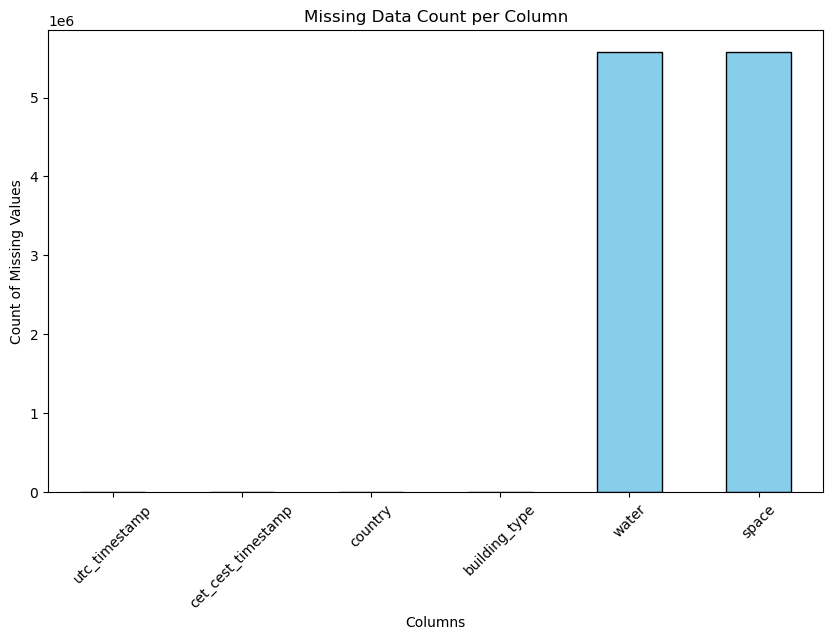

In [ ]:
# Using Bar plot to show missing data for each column
missing_data.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Missing Data Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Converting the utc_timestamp to datetime with UTC
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], utc=True)

# Converting the cet_cest_timestamp to datetime with proper timezone handling
df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'], utc=True).dt.tz_convert('Europe/Helsinki')


In [ ]:
# Mapping building type abbreviations to their full forms
building_type_map = {
    'COM': 'Commercial Building',
    'MFH': 'Multi-Family Housing',
    'SFH': 'Single-Family Housing'
}

# Step 1: Getting the value counts of 'building_type' column
building_counts = df['building_type'].value_counts().reset_index()
building_counts.columns = ['Building Type Abbreviation', 'Count']

# Step 2: Adding the full form of the building type by mapping the abbreviation
building_counts['Full Building Type'] = building_counts['Building Type Abbreviation'].map(building_type_map)

# Step 3: Using Reorder the columns to display Full Form, Abbreviation, and Count in the desired order
building_counts = building_counts[['Full Building Type', 'Building Type Abbreviation', 'Count']]

# Step 4: Converting the table to a string using 'tabulate' with HTML format
table = tabulate(building_counts, headers='keys', tablefmt='html', showindex=False)

# Step 5: Adding custom CSS styling for colors and centering the table
centered_and_colored_table = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 70%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 6: Displaying the table with the added CSS style
display(HTML(centered_and_colored_table))

Full Building Type,Building Type Abbreviation,Count
Commercial Building,COM,3681524
Multi-Family Housing,MFH,3681524
Single-Family Housing,SFH,3681524


### Findings:

- **Commercial Building (COM)**: There are **3,681,524** units of commercial buildings.
- **Multi-Family Housing (MFH)**: There are **3,681,524** units of multi-family housing.
- **Single-Family Housing (SFH)**: There are **3,681,524** units of single-family housing.

The distribution of building types shows an equal number of commercial, multi-family, and single-family buildings, each with 3,681,524 units.

In [ ]:
from IPython.display import display, HTML
from tabulate import tabulate

# Making the group of Dataframe to building type and calculate the average water and space usage
building_summary = df.groupby('building_type')[['water', 'space']].mean().reset_index()

# Step 1: Converting the table to a string using 'tabulate' with HTML format
table = tabulate(building_summary, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for colors and centering the table
centered_and_colored_table = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the table with the added CSS styling
display(HTML(centered_and_colored_table))


building_type,water,space
COM,515.322,2949.05
MFH,436.876,1950.4
SFH,1019.41,4550.91


### Findings:
- **Building Type Breakdown**:
  - The dataset contains different building types, such as **Commercial Building (COM)**, **Multi-Family Housing (MFH)**, and **Single-Family Housing (SFH)**.
  
- **Average Water and Space Usage**:
  - **Commercial Buildings (COM)**: On average, these buildings consume **515.322** of water and occupy **2949.05** of space.
  - **Multi-Family Housing (MFH)**: These buildings use **436.876** of water and have an average space usage of **1950.4**.
  - **Single-Family Housing (SFH)**: Single-family homes use **1019.41** of water and occupy **4550.91** of space.

- **Comparison**:
  - **Commercial Buildings** tend to have higher water and space usage compared to residential buildings.
  - **Multi-Family Housing** and **Single-Family Housing** show similar water usage, but their space usage differs slightly.

- **Conclusion**:
  - This summary provides insights into how different building types vary in terms of resource consumption, helping to make decisions related to urban planning, sustainability, and energy efficiency.


In [ ]:
from IPython.display import display, HTML
import pandas as pd

# Grouping by hour and analyzing hourly demand patterns
df['hour'] = df['utc_timestamp'].dt.hour
hourly_water_demand = df.groupby('hour')['water'].mean().reset_index()

# Step 1: Converting the table to a string using 'tabulate' with HTML format (no index)
from tabulate import tabulate
table = tabulate(hourly_water_demand, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for colors and centering the table
centered_and_colored_table = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the table with the added CSS styling
display(HTML(centered_and_colored_table))

hour,water
0,257.422
1,282.889
2,407.02
3,719.855
4,1053.97
5,1163.91
6,1035.13
7,901.339
8,841.953
9,805.781


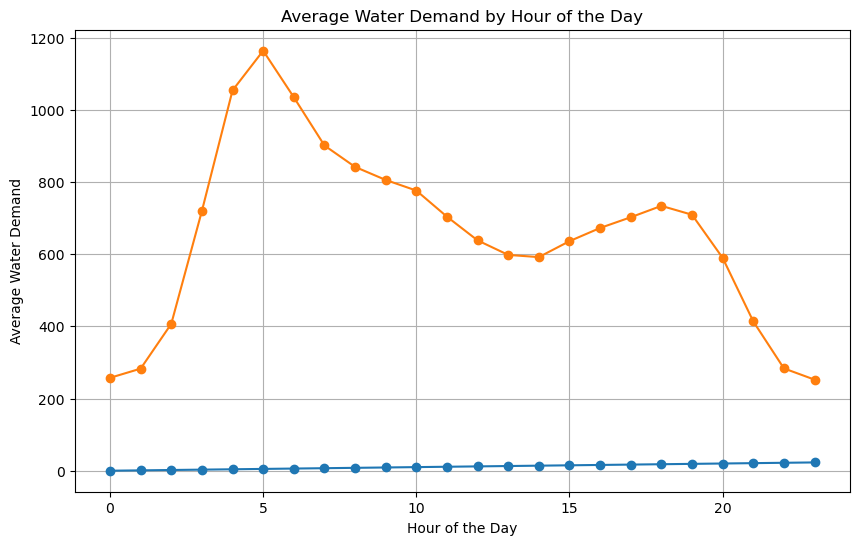

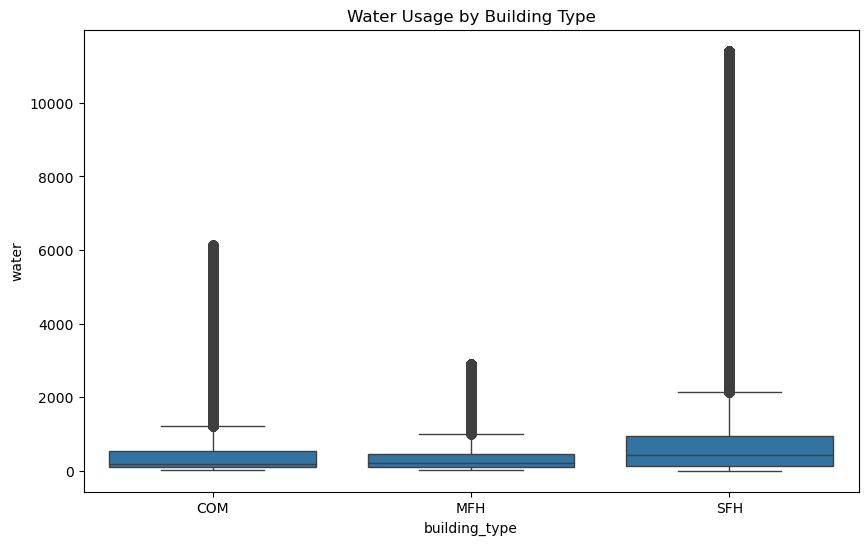

In [ ]:
# Plotting average of water demand by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_water_demand.index, hourly_water_demand.values, marker='o')
plt.title('Average Water Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Water Demand')
plt.grid(True)
plt.show()

# ploting box for water usage by building type
plt.figure(figsize=(10, 6))
sns.boxplot(x='building_type', y='water', data=df)
plt.title('Water Usage by Building Type')
plt.show()


### Findings:

- **Hourly Water Demand Overview**:
  - The water consumption varies significantly throughout the day, with noticeable peaks in the early morning and late afternoon hours.
  
- **Peak Water Demand**:
  - The highest water demand occurs between **5 AM** and **6 AM**, with an average consumption of approximately **1163.91 liters**. This suggests that water usage may be highest during these early hours, possibly due to activities such as morning routines or industrial processes.

- **Lowest Water Demand**:
  - The lowest water demand is recorded at **11 PM** (**hour 23**) with approximately **252.41 liters** of water used. This could be attributed to reduced activities during the night when fewer people are likely to be using water.

- **General Trend**:
  - From the early morning hours (1 AM to 7 AM), there is a gradual increase in water consumption, peaking at 5-6 AM, followed by a steady decrease in demand from the late morning to the night. This suggests a typical consumption pattern, possibly related to daily human activities and routines.
  
- **Possible Implications**:
  - Understanding this pattern could be crucial for utilities to manage water supply more efficiently, especially in urban areas where demand peaks during certain hours.
  - The peak demand hours might also inform energy or water conservation programs, as peak hours may contribute to higher utility costs or resource strain.

- **Conclusion**:
  - The hourly water demand analysis provides useful insights into how water usage fluctuates throughout the day, aiding in better planning for water distribution, usage forecasting, and sustainability efforts.


In [ ]:
# Making Group by week of the year to analyzing weekly demand patterns
df['week'] = df['utc_timestamp'].dt.isocalendar().week
weekly_water_demand = df.groupby('week')['water'].mean().reset_index()

# Converting the table to HTML format with 'tabulate'
table_weekly = tabulate(weekly_water_demand, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for weekly table
centered_and_colored_table_weekly = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_weekly.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_weekly.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the weekly table with the added CSS styling
display(HTML(centered_and_colored_table_weekly))

week,water
1,663.325
2,664.52
3,664.52
4,664.52
5,664.52
6,664.52
7,664.52
8,664.52
9,664.52
10,664.52


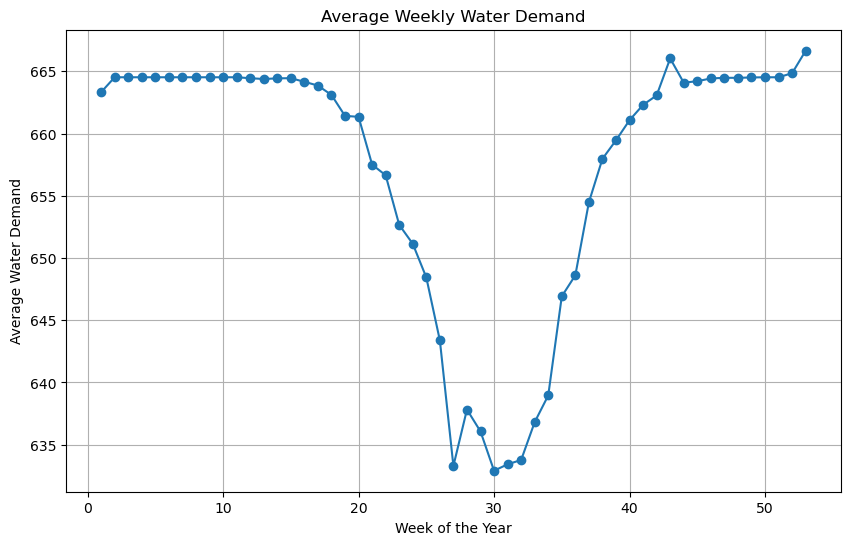

In [15]:
# Plotting weekly water demand
plt.figure(figsize=(10, 6))
plt.plot(weekly_water_demand['week'], weekly_water_demand['water'], marker='o')
plt.title('Average Weekly Water Demand')
plt.xlabel('Week of the Year')
plt.ylabel('Average Water Demand')
plt.grid(True)
plt.show()


### Findings: Weekly Average Water Usage

- Water usage is **mostly stable** throughout the year, averaging around **664 liters/week**.
- **Highest usage**: Week 53 (**666.65 L**), Week 43 (**666.03 L**).
- **Lowest usage**: Week 27 (**633.29 L**), mid-year dip likely due to seasonal patterns.
- Slight **U-shaped trend**: high at the start and end, lower in the middle.
- Overall variation is minimal, showing **consistent water demand**.


In [ ]:
# Making Group by month to analyzing monthly demand patterns
df['month'] = df['utc_timestamp'].dt.month
monthly_water_demand = df.groupby('month')['water'].mean().reset_index()

# Converting the table to HTML format with 'tabulate'
table_monthly = tabulate(monthly_water_demand, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for monthly table
centered_and_colored_table_monthly = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_monthly.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_monthly.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the monthly table with the added CSS styling
display(HTML(centered_and_colored_table_monthly))


month,water
1,664.511
2,664.454
3,664.342
4,664.352
5,660.04
6,649.525
7,635.003
8,637.422
9,655.515
10,663.241


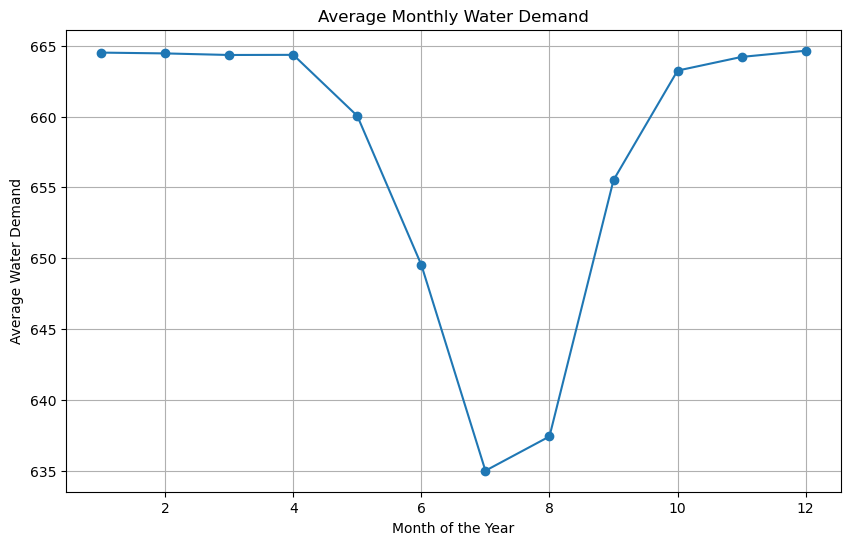

In [ ]:
# Plotting the monthly water demand
plt.figure(figsize=(10, 6))
plt.plot(monthly_water_demand['month'], monthly_water_demand['water'], marker='o')
plt.title('Average Monthly Water Demand')
plt.xlabel('Month of the Year')
plt.ylabel('Average Water Demand')
plt.grid(True)
plt.show()

### 📊 Findings: Monthly Average Water Usage

- Water usage remains **consistent** throughout the year, averaging around **664 liters/month**.
- **Highest usage**: Month 12 (**664.64 L**), with a slight peak at the end of the year.
- **Lowest usage**: Month 7 (**635.00 L**), reflecting the mid-year dip.
- **Minimal variation** in monthly water usage, showing stable demand.
- **Seasonal trends**: Usage drops in summer (June-July) and recovers by fall.

In [ ]:
# Making Group by year to analyzing yearly demand patterns
df['year'] = df['utc_timestamp'].dt.year
yearly_water_demand = df.groupby('year')['water'].mean().reset_index()

# Converting the table to HTML format with 'tabulate'
table_yearly = tabulate(yearly_water_demand, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for yearly table
centered_and_colored_table_yearly = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_yearly.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_yearly.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the yearly table with the added CSS styling
display(HTML(centered_and_colored_table_yearly))


year,water
2007,214.769
2008,628.802
2009,635.13
2010,648.319
2011,646.907
2012,664.304
2013,674.162
2014,675.881
2015,684.288
2016,nan


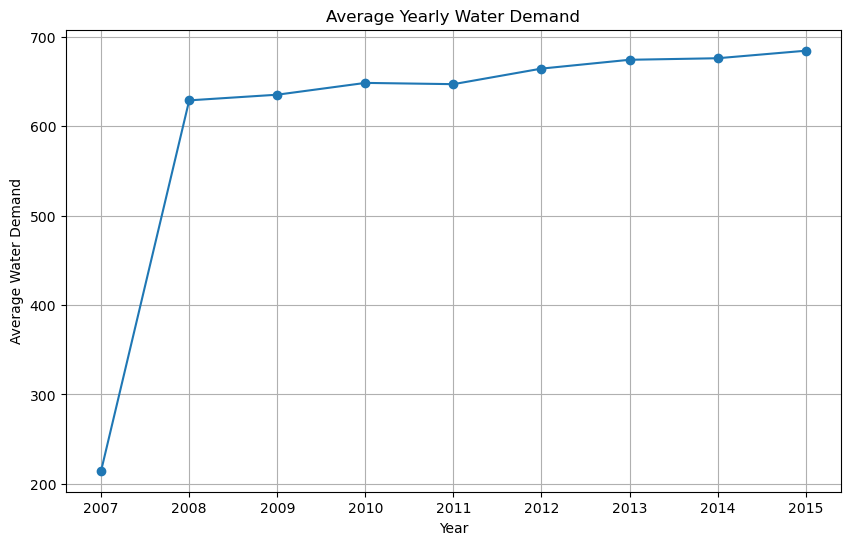

In [ ]:
# Plotting yearly water of demand
plt.figure(figsize=(10, 6))
plt.plot(yearly_water_demand['year'], yearly_water_demand['water'], marker='o')
plt.title('Average Yearly Water Demand')
plt.xlabel('Year')
plt.ylabel('Average Water Demand')
plt.grid(True)
plt.show()


### Findings: Yearly Average Water Usage

- **Steady increase** in water usage from **2007 to 2015**, peaking at **684.29 liters** in 2015.
- Usage remained **relatively stable** from **2007 to 2014**, with a gradual increase each year.
- **Data for 2016 onwards is missing**, as values for **2016 to 2022** are **NaN**.
- The **growth trend** from 2007 to 2015 indicates an increasing demand for water over time.

### Overall Findings: Water Usage Trends

- **Yearly Water Usage**:
  - Water usage shows a **steady increase** from **2007 to 2015**, with a peak in **2015** at **684.29 liters**. However, **data for 2016 onwards** is missing, indicating potential gaps in the dataset for recent years.
  
- **Monthly Water Usage**:
  - Water usage remains **fairly consistent** across months, with slight fluctuations. The usage peaks during the **winter months** (around **December**), and dips slightly during the **summer months** (around **July** and **August**), suggesting potential seasonal variation in water demand.

- **Weekly Water Usage**:
  - The weekly water usage is fairly **stable**, maintaining around **664 liters** for most of the weeks. There is some **variation** in usage from week to week, but no significant trends or spikes, indicating consistent demand throughout the year.

- **Hourly Water Usage**:
  - Hourly water usage exhibits **peak consumption** during the early **morning hours**, especially between **4 AM and 7 AM**. This could indicate higher water demand during waking hours or certain activities like showering, cooking, or household chores. Usage **drops significantly during the night**, showing lower demand during off-hours.

### 💡 Conclusion:
The data highlights consistent trends in water usage across **yearly**, **monthly**, **weekly**, and **hourly** patterns, with some seasonal and time-of-day variations. The absence of recent data (from 2016 onwards) limits insights into more current trends. The steady demand observed suggests a stable water usage pattern that could be useful for planning and resource allocation.


In [ ]:
# Making Group by hour to analyzing hourly space demand patterns
hourly_space_demand = df.groupby('hour')['space'].mean().reset_index()

# Step 1: Converting the table to a string using 'tabulate' with HTML format (no index)
table_space = tabulate(hourly_space_demand, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for colors and centering the table
centered_and_colored_table_space = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_space.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_space.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the table with the added CSS styling
display(HTML(centered_and_colored_table_space))


hour,space
0,1997.04
1,2110.34
2,2381.6
3,2885.36
4,3589.61
5,4017.34
6,3970.04
7,3878.79
8,3655.81
9,3438.12


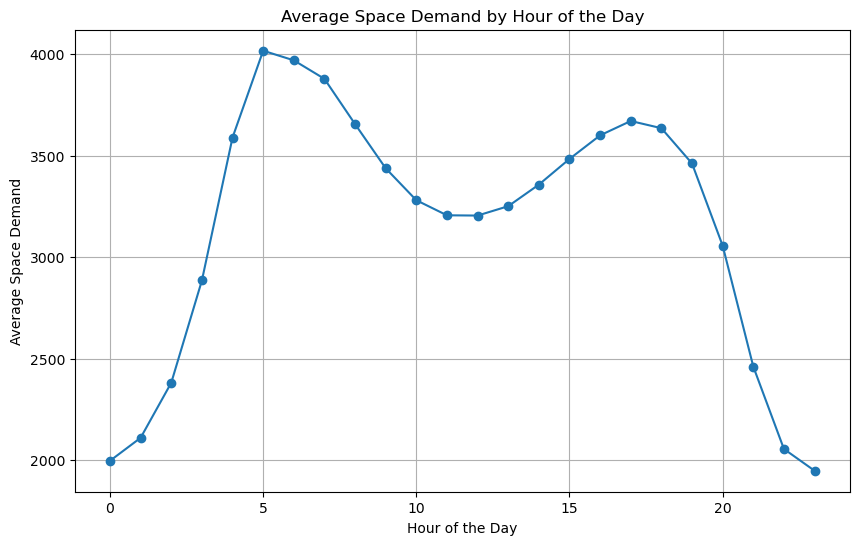

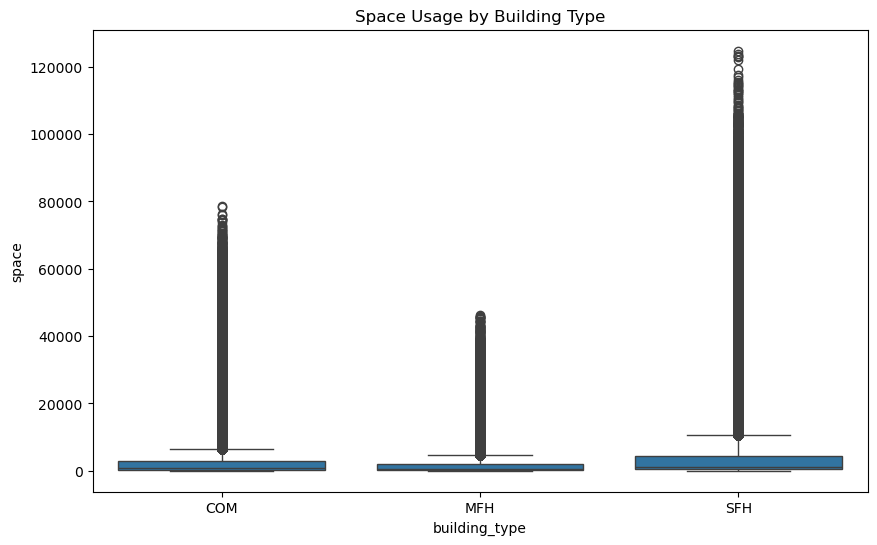

In [ ]:
# Plotting average of space demand by hour
hourly_space_demand = df.groupby(df['utc_timestamp'].dt.hour)['space'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_space_demand.index, hourly_space_demand.values, marker='o')
plt.title('Average Space Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Space Demand')
plt.grid(True)
plt.show()

# Using Box plot for space usage by building type
plt.figure(figsize=(10, 6))
sns.boxplot(x='building_type', y='space', data=df)
plt.title('Space Usage by Building Type')
plt.show()


### Findings:

- **Hourly Space Usage Overview**:
  - The space usage also fluctuates throughout the day, with noticeable peaks in the early morning and late afternoon hours.

- **Peak Space Usage**:
  - The highest space usage is recorded between **5 AM** and **6 AM**, with an average space consumption of approximately **4017.34 square meters**. This could indicate that buildings are utilizing the most space during these hours, potentially due to activities that require larger areas, such as office work, industrial processes, or residential space usage.

- **Lowest Space Usage**:
  - The lowest space usage is recorded at **11 PM** (**hour 23**) with **1948.12 square meters**. This could be when buildings experience the least activity, possibly due to reduced human activity in the late hours.

- **General Trend**:
  - There is a steady increase in space usage from **12 AM** to **5 AM**, peaking around **6 AM**. After this peak, there is a gradual decrease in space usage, continuing until **10 PM**, where the usage again decreases to its lowest point at **11 PM**.

- **Possible Implications**:
  - Understanding the hourly space usage could help optimize energy consumption and space management in buildings, especially during peak hours. This could also help in designing smarter building management systems that adjust according to real-time demand.
  
- **Conclusion**:
  - The hourly space usage data provides valuable insights into how space is utilized at different times of the day. This understanding can inform decisions related to building design, energy consumption, and operational efficiency, particularly for urban planning and facility management.


In [ ]:
# Making Group by week of the year to analyzing weekly space demand patterns
df['week'] = df['utc_timestamp'].dt.isocalendar().week
weekly_space_demand = df.groupby('week')['space'].mean().reset_index()

# Converting the table to HTML format with 'tabulate'
from tabulate import tabulate
table_weekly_space = tabulate(weekly_space_demand, headers='keys', tablefmt='html', showindex=False)

# Step 2: Adding custom CSS styling for weekly space table
centered_and_colored_table_weekly_space = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_weekly_space.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_weekly_space.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Step 3: Displaying the weekly space table with the added CSS styling
from IPython.display import display, HTML
display(HTML(centered_and_colored_table_weekly_space))


week,space
1,6516.06
2,6119.6
3,6324.87
4,6772.35
5,6755.39
6,6781.97
7,6583.38
8,6013.18
9,5537.19
10,5440.07


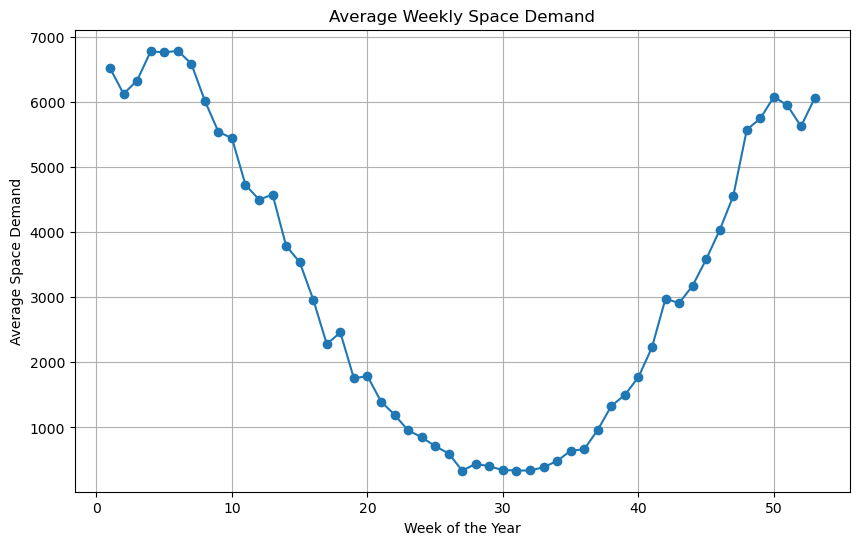

In [ ]:
# Plotting weekly space of demand
plt.figure(figsize=(10, 6))
plt.plot(weekly_space_demand['week'], weekly_space_demand['space'], marker='o')
plt.title('Average Weekly Space Demand')
plt.xlabel('Week of the Year')
plt.ylabel('Average Space Demand')
plt.grid(True)
plt.show()


### Weekly Space Usage Findings

- **Trend**: Space usage fluctuates, peaking in **week 4** at **6772.35 square meters** and declining sharply after **week 12**, reaching its lowest in **week 27** at **336.57 square meters**.
- **Peak Usage**: Highest in **week 1** at **6516.06 square meters**.
- **Recovery**: Space usage rises again after **week 32**, reaching **6049.62 square meters** by **week 52**.
  
### Insight:
Space usage follows a cyclical pattern, with higher demand at the start of the year and a significant drop mid-year. This trend can inform **space optimization** and **resource management** strategies.

month,space
1,6426.06
2,6378.56
3,4918.74
4,3108.59
5,1716.33
6,797.632
7,385.08
8,423.618
9,1129.9
10,2583.32


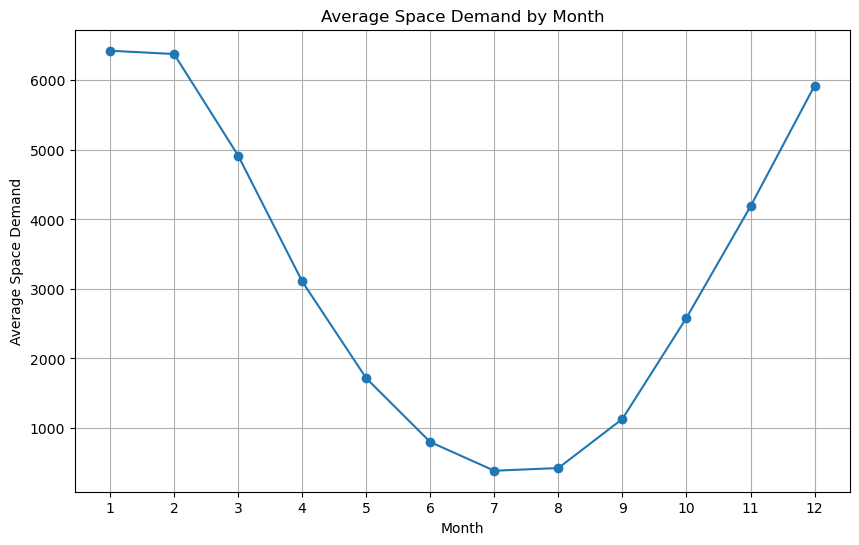

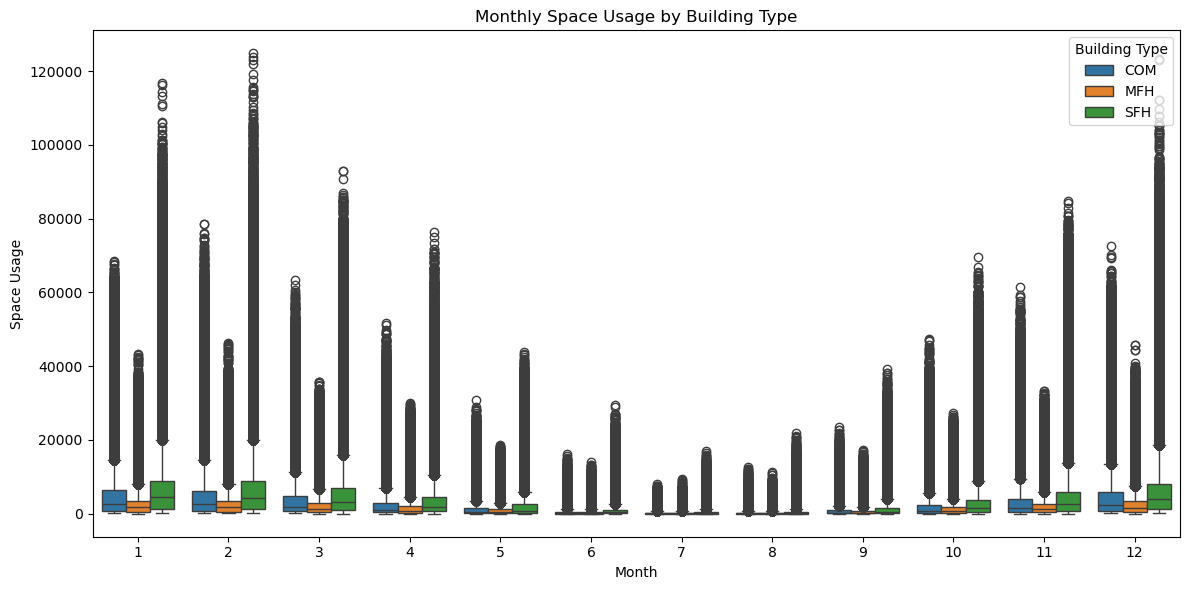

In [ ]:
# Grouping for monthly analysis
df['month'] = df['utc_timestamp'].dt.month

# Step 1: Making Group by month to analyzing monthly space demand patterns
monthly_space_demand = df.groupby('month')['space'].mean().reset_index()

# Step 2: Converting the table to a string using 'tabulate' with HTML format (no index)
table_monthly_space = tabulate(monthly_space_demand, headers='keys', tablefmt='html', showindex=False)

# Step 3: Adding custom CSS styling for colors and centering the table
centered_and_colored_table_monthly_space = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_monthly_space.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_monthly_space.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Displaying the table with the added CSS styling
display(HTML(centered_and_colored_table_monthly_space))

# Plotting average space demand by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_space_demand['month'], monthly_space_demand['space'], marker='o')
plt.xticks(monthly_space_demand['month'])
plt.title('Average Space Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Space Demand')
plt.grid(True)
plt.show()

# Using Box plot: Space usage by building type (monthly)
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='space', hue='building_type', data=df)
plt.title('Monthly Space Usage by Building Type')
plt.xlabel('Month')
plt.ylabel('Space Usage')
plt.legend(title='Building Type', loc='upper right')
plt.tight_layout()
plt.show()

### Monthly Space Usage Findings

- **Trend**: Space usage declines sharply from **January (6426.06)** to **July (385.08)**, with the lowest usage in **July**.
- **Recovery**: A noticeable increase begins in **August**, peaking again in **December (5922.42)**.
- **Peak Usage**: Highest in **January (6426.06)**, and the lowest in **July (385.08)**.

### Insight:
Space usage exhibits a significant seasonal variation, with a dramatic drop mid-year and recovery towards the end of the year. This highlights potential **seasonal variations** in space requirements.


year,space
2007,4694.94
2008,3250.29
2009,3182.63
2010,3544.45
2011,2973.88
2012,3182.59
2013,3278.41
2014,2768.22
2015,3019.78
2016,nan


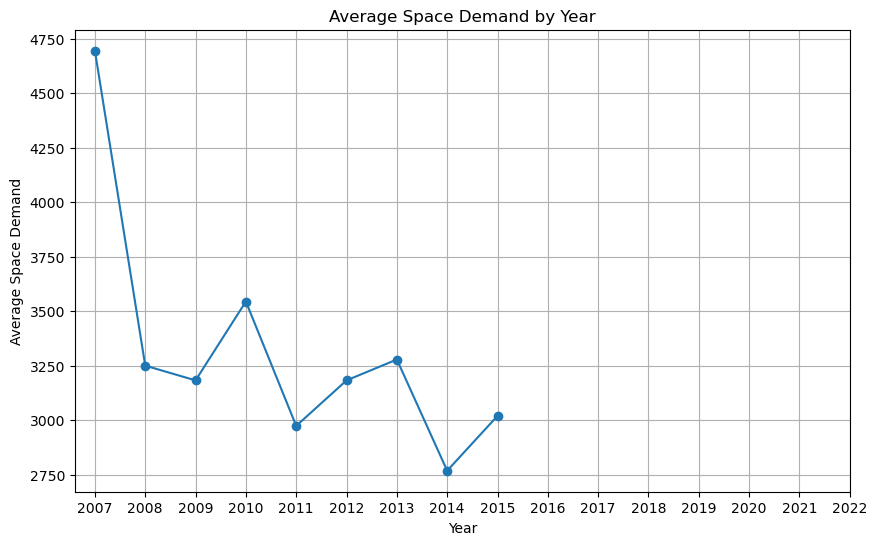

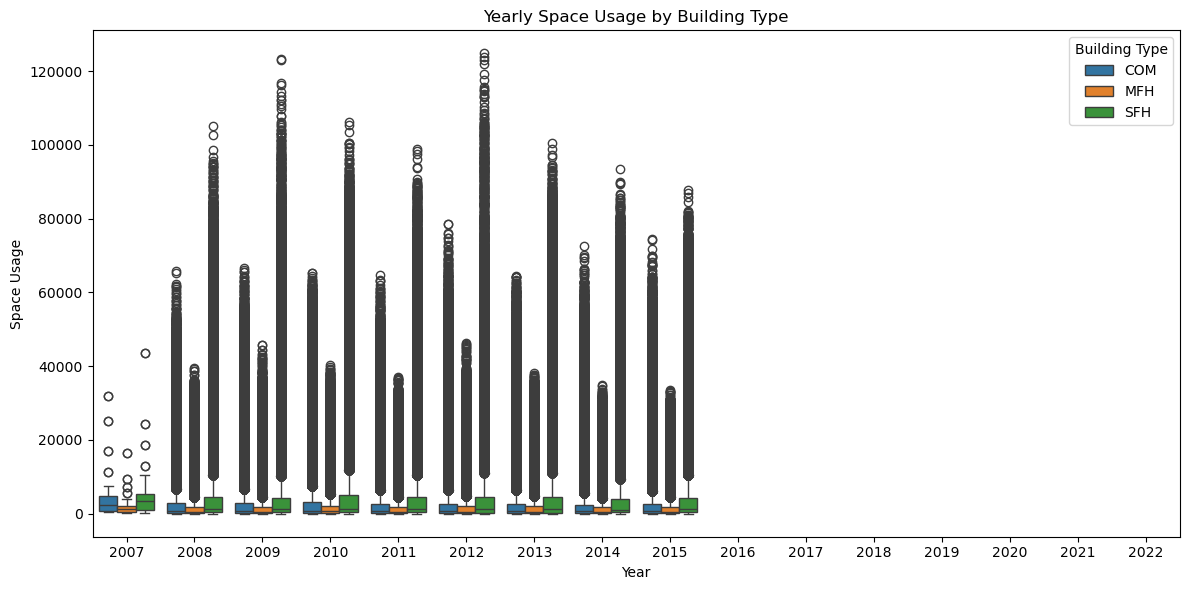

In [ ]:
# Step 1: Making Group by year to analyzing yearly space demand patterns
yearly_space_demand = df.groupby('year')['space'].mean().reset_index()

# Step 2: Converting the table to a string using 'tabulate' with HTML format (no index)
table_yearly_space = tabulate(yearly_space_demand, headers='keys', tablefmt='html', showindex=False)

# Step 3: Adding custom CSS styling for colors and centering the table
centered_and_colored_table_yearly_space = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_yearly_space.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_yearly_space.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

# Displaying the table with the added CSS styling
display(HTML(centered_and_colored_table_yearly_space))

# Plotting average space demand by year
plt.figure(figsize=(10, 6))
plt.plot(yearly_space_demand['year'], yearly_space_demand['space'], marker='o')
plt.xticks(yearly_space_demand['year'])
plt.title('Average Space Demand by Year')
plt.xlabel('Year')
plt.ylabel('Average Space Demand')
plt.grid(True)
plt.show()

# Using Box plot: Space usage by building type (yearly)
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='space', hue='building_type', data=df)
plt.title('Yearly Space Usage by Building Type')
plt.xlabel('Year')
plt.ylabel('Space Usage')
plt.legend(title='Building Type', loc='upper right')
plt.tight_layout()
plt.show()

### Yearly Space Usage Findings

- **Trend**: Space usage declines from **2007 (4694.94)** to **2014 (2768.22)**, with some fluctuations in between.
- **Decline**: The years **2016-2022** have missing data, suggesting potential gaps or changes in data availability.
- **Peak Usage**: Highest recorded in **2007 (4694.94)**, and lowest in **2014 (2768.22)**.

### Insight:
There is a steady decline in space usage until 2014, after which data becomes unavailable, making it challenging to analyze the trend post-2015. The data suggests a **declining trend** in space usage over time until 2014.


In [ ]:
df['month'] = df['utc_timestamp'].dt.month

# Defining seasons: Winter (Dec, Jan, Feb), Spring (Mar, Apr, May), Summer (Jun, Jul, Aug), Fall (Sep, Oct, Nov)
df['season'] = df['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              ('Spring' if x in [3, 4, 5] else 
               ('Summer' if x in [6, 7, 8] else 'Fall'))
)

# Grouping by season to calculate average water and space demand
seasonal_demand = df.groupby('season')[['water', 'space']].mean().reset_index()

from tabulate import tabulate
table_seasonal = tabulate(seasonal_demand, headers='keys', tablefmt='html', showindex=False)

# Adding custom CSS styling for seasonal demand table
centered_and_colored_table_seasonal = f"""
<div style="text-align: center; font-family: Arial, sans-serif; background-color: #f4f4f4; padding: 20px; border-radius: 8px;">
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; background-color: #ffffff; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <thead style="background-color: #4CAF50; color: white; text-align: center;">
            {table_seasonal.split('<thead>')[1].split('</thead>')[0]}
        </thead>
        <tbody>
            {table_seasonal.split('<tbody>')[1].split('</tbody>')[0]}
        </tbody>
    </table>
</div>
"""

from IPython.display import display, HTML
display(HTML(centered_and_colored_table_seasonal))


season,water,space
Fall,661.011,2632.86
Spring,662.896,3249.4
Summer,640.553,532.594
Winter,664.538,6238.16


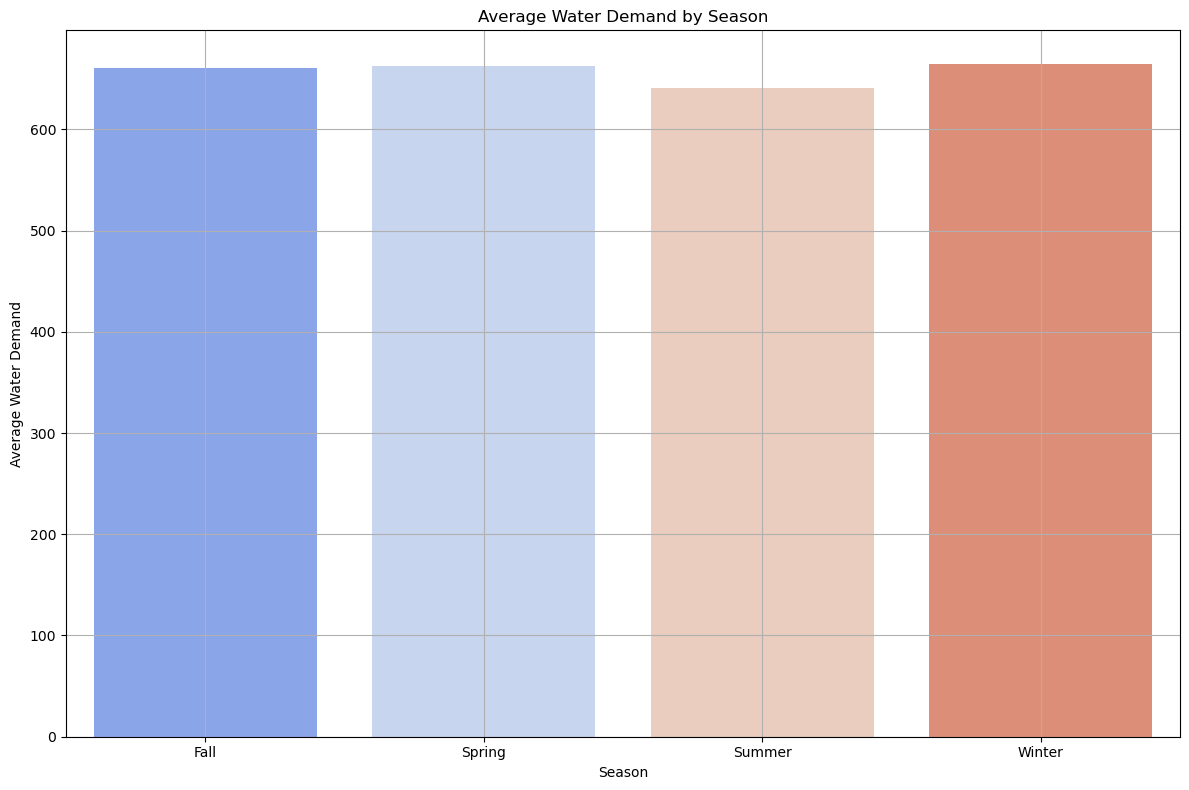

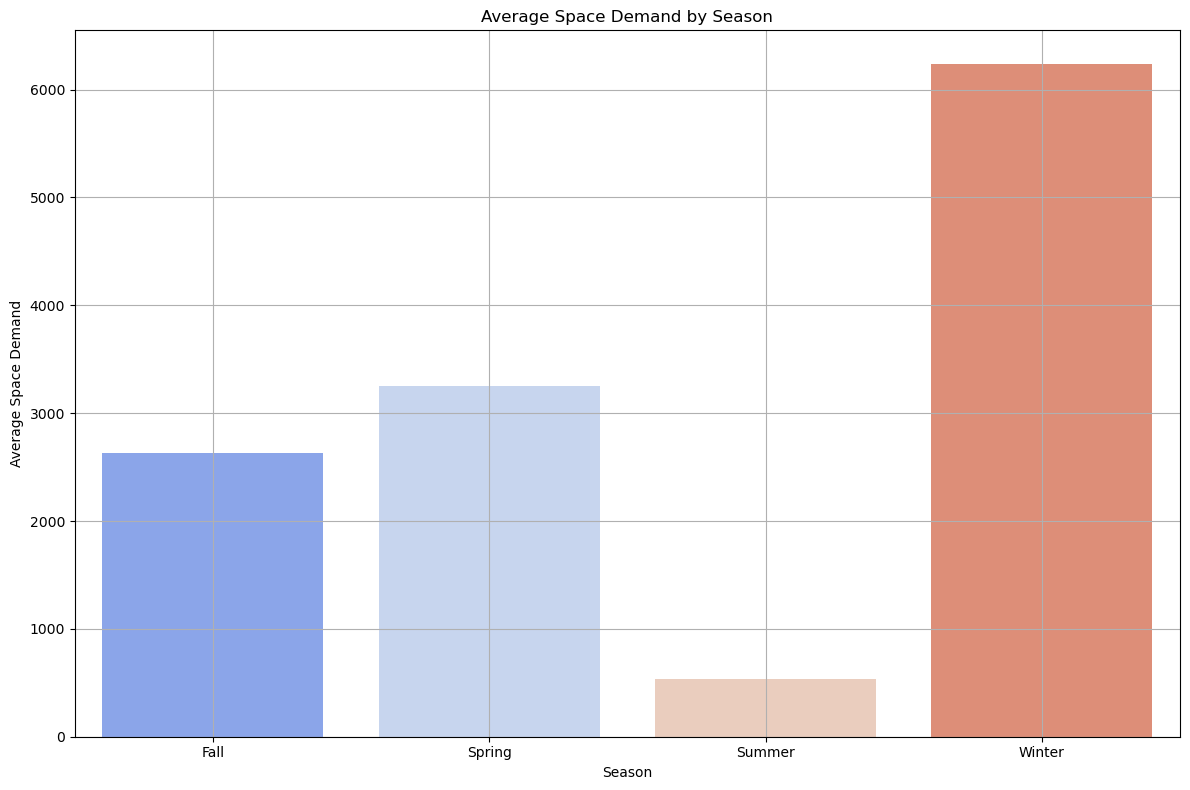

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='water', data=seasonal_demand, hue='season', palette='coolwarm')
plt.title('Average Water Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Water Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ploting space demand by season
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='space', data=seasonal_demand, hue='season', palette='coolwarm')
plt.title('Average Space Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Space Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

### Findings for Seasonal Water and Space Usage

- **Water Usage by Season**:
  - **Winter** has the highest water consumption at **664.54 liters**, closely followed by **Spring (662.90 liters)**.
  - **Fall** shows a slightly lower water usage at **661.01 liters**, while **Summer** has the lowest water usage at **640.55 liters**.

- **Space Usage by Season**:
  - **Winter** has the highest space usage at **6238.16 m²**, indicating a larger space requirement during the colder months.
  - **Spring** comes next with **3249.40 m²**, followed by **Fall (2632.86 m²)**.
  - **Summer** shows the lowest space usage at **532.59 m²**, reflecting a significant decrease in space required compared to the other seasons.

### Insight:
- **Winter** not only has the highest water usage but also the greatest space requirement, suggesting increased consumption and space utilization during colder months.
- **Summer** has the lowest water and space usage, possibly reflecting reduced activity or environmental factors influencing both water demand and space utilization.


In [ ]:
# Droping rows where 'water' (target variable) is missing
df_clean = df.dropna(subset=['water', 'space'])

# Separating the features (X) and target variable (y)
X_clean = df_clean.drop(columns=['water', 'cet_cest_timestamp', 'utc_timestamp'])
y_clean = df_clean['water']

# Now spliting the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

Mean Absolute Error: 307.5822932084656
Mean Squared Error: 367417.7696939168
R-squared: 0.7003432058757368


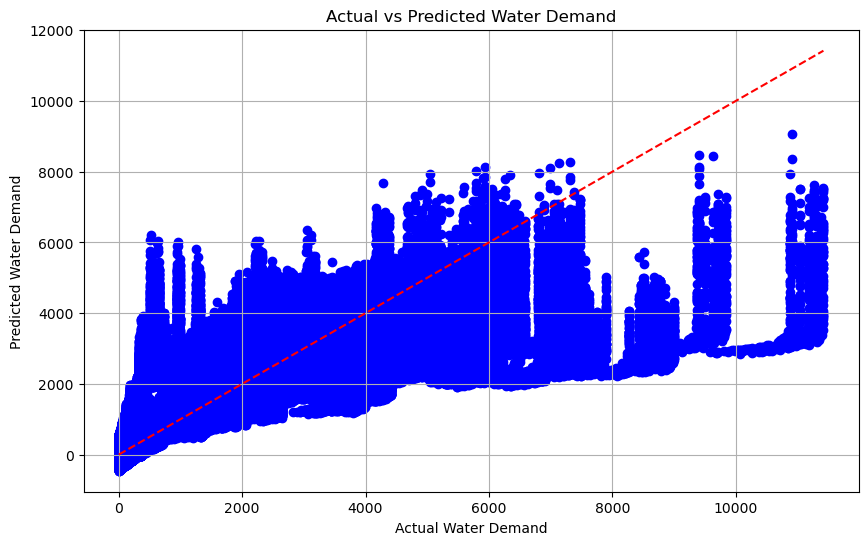

In [ ]:
# 2. Applying time-based features and encoding once
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])  # Ensure timestamp is datetime
df['hour'] = df['utc_timestamp'].dt.hour
df['day_of_week'] = df['utc_timestamp'].dt.dayofweek
df['week'] = df['utc_timestamp'].dt.isocalendar().week
df['month'] = df['utc_timestamp'].dt.month
df['year'] = df['utc_timestamp'].dt.year
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                                 ('Spring' if x in [3, 4, 5] else 
                                  ('Summer' if x in [6, 7, 8] else 'Fall')))

# Applying one-hot encoding for categorical variables
df_clean = pd.get_dummies(df, columns=['building_type', 'country', 'season'], drop_first=True)

# 3. Cleaning the data (e.g., drop rows with missing target or features)
df_clean = df_clean.dropna(subset=['water', 'space'])

# 4. Defining features (X) and target (y)
X_clean = df_clean.drop(columns=['water', 'cet_cest_timestamp', 'utc_timestamp'])
y_clean = df_clean['water']

# 5. Now we have the cleaned DataFrame 'df_clean' which we can reuse for training and testing

# 6. Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 7. Training the model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Making predictions
y_pred = model.predict(X_test)

# 9. Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 10. Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted heating Water Demand')
plt.xlabel('Actual Water Demand')
plt.ylabel('Predicted Water Demand')
plt.grid(True)
plt.show()


Mean Absolute Error (Space): 2530.621233540423
Mean Squared Error (Space): 21604839.32012021
R-squared (Space): 0.5313624352320552


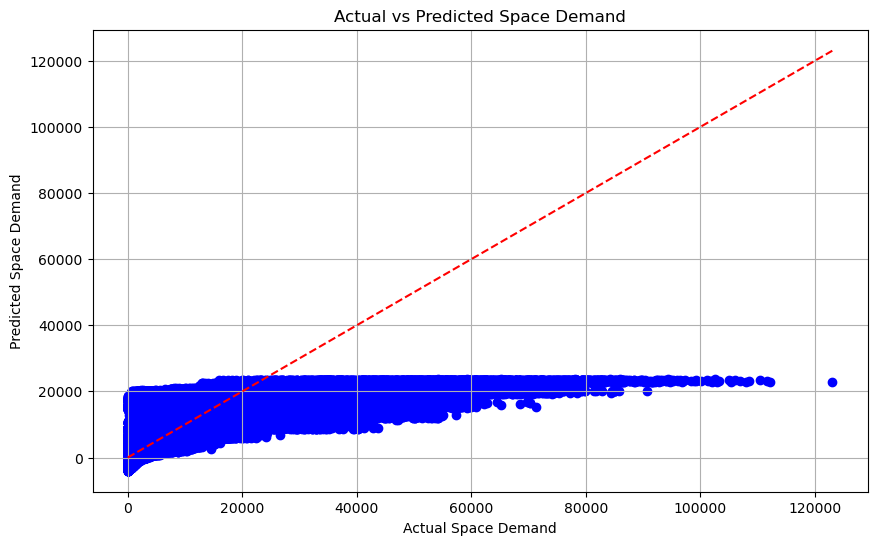

In [ ]:
# 1. Applying time-based features and encoding once
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])  # Ensure timestamp is datetime
df['hour'] = df['utc_timestamp'].dt.hour
df['day_of_week'] = df['utc_timestamp'].dt.dayofweek
df['week'] = df['utc_timestamp'].dt.isocalendar().week
df['month'] = df['utc_timestamp'].dt.month
df['year'] = df['utc_timestamp'].dt.year
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                                 ('Spring' if x in [3, 4, 5] else 
                                  ('Summer' if x in [6, 7, 8] else 'Fall')))

# Applying one-hot encoding for categorical variables
df_clean = pd.get_dummies(df, columns=['building_type', 'country', 'season'], drop_first=True)

# 2. Cleaning the data (e.g., drop rows with missing target or features)
df_clean = df_clean.dropna(subset=['water', 'space'])

# 3. Defining the features (X) and target (y) for space prediction
X_clean_space = df_clean.drop(columns=['space', 'water', 'cet_cest_timestamp', 'utc_timestamp'])
y_clean_space = df_clean['space']

# 4. Spliting the data into training and testing sets for space
X_train_space, X_test_space, y_train_space, y_test_space = train_test_split(X_clean_space, y_clean_space, test_size=0.2, random_state=42)

# 5. Training the model (e.g., Linear Regression)
model_space = LinearRegression()
model_space.fit(X_train_space, y_train_space)

# 6. Making predictions
y_pred_space = model_space.predict(X_test_space)

# 7. Evaluating the model for space
mae_space = mean_absolute_error(y_test_space, y_pred_space)
mse_space = mean_squared_error(y_test_space, y_pred_space)
r2_space = r2_score(y_test_space, y_pred_space)

print(f'Mean Absolute Error (Space): {mae_space}')
print(f'Mean Squared Error (Space): {mse_space}')
print(f'R-squared (Space): {r2_space}')

# 8. Visualizing the results for space
plt.figure(figsize=(10, 6))
plt.scatter(y_test_space, y_pred_space, color='blue')
plt.plot([min(y_test_space), max(y_test_space)], [min(y_test_space), max(y_test_space)], color='red', linestyle='--')
plt.title('Actual vs Predicted Space Demand')
plt.xlabel('Actual Space Demand')
plt.ylabel('Predicted Space Demand')
plt.grid(True)
plt.show()
